In [30]:
!pip install deap
# определение функции
def FButa(x, y):
    return np.power((x - y), 2.) + np.power(((x + y - 10)/3), 2.);

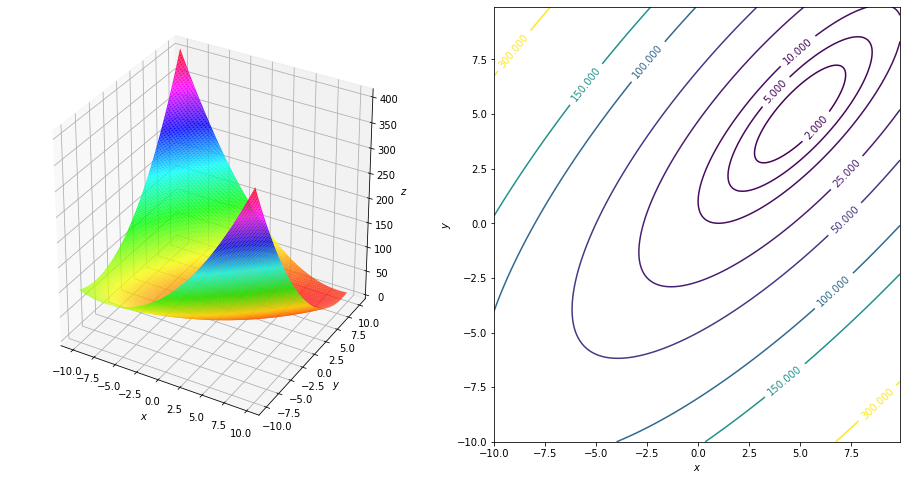

In [31]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# определение данных
X = np.arange(-10, 10, .1)
Y = np.arange(-10, 10, .1)
X, Y = np.meshgrid(X, Y)

Z = FButa(X,Y)

# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# вывод функции (1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# построение поверхности
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hsv, 
                       linewidth=0, antialiased=True)

# вывод функции (2)
ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300])

# добавление подписей к линиям уровня
ax.clabel(cs)

plt.show()

In [36]:
# определение функции
def FButa(individual):
    x = individual[0];
    y = individual[1];
    
    return np.power((x - y), 2.) + np.power(((x + y - 10)/3), 2.),

In [37]:

from deap import algorithms
from deap import base
from deap import benchmarks
from deap import cma
from deap import creator
from deap import tools

# Problem size
N=2;

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("evaluate", FButa)

def main():
    # The cma module uses the numpy random number generator
    np.random.seed(128)

    # The CMA-ES algorithm takes a population of one individual as argument
    # The centroid is set to a vector of 5.0
    strategy = cma.Strategy(centroid=[5.0]*N, sigma=5.0, lambda_=20*N)
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    #logger = tools.EvolutionLogger(stats.functions.keys())
   
    # The CMA-ES algorithm converge with good probability with those settings
    pop, logbook = algorithms.eaGenerateUpdate(toolbox, ngen=55, stats=stats, halloffame=hof, verbose = False)
    
    return pop, logbook, hof

In [38]:
pop, stats, hof = main();

In [39]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

Best individual is [5.000000000000009, 5.000000000000003], (5.127595883936577e-29,)


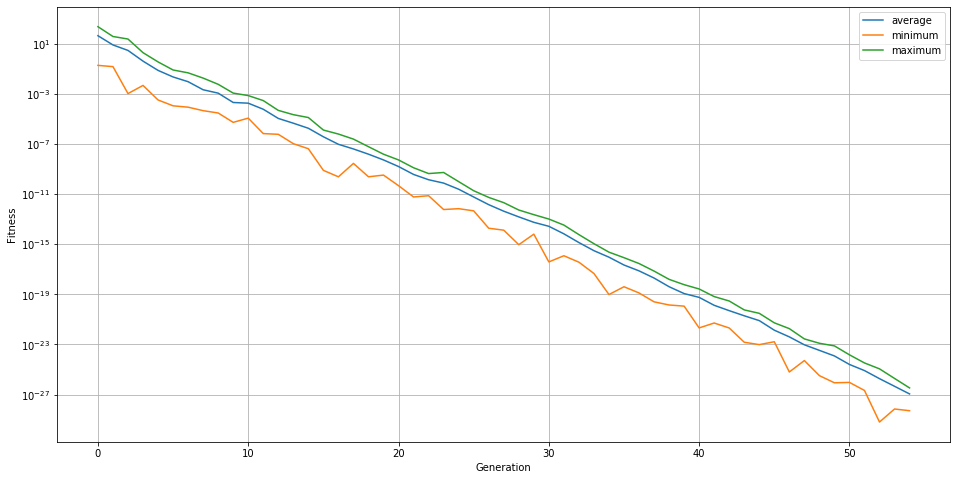

In [40]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

gen, avg, min_, max_ = stats.select("gen", "avg", "min", "max")
plt.semilogy(gen, avg, label="average")
plt.semilogy(gen, min_, label="minimum")
plt.semilogy(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend(loc="upper right")
plt.grid()
plt.show()



In [42]:
from operator import itemgetter
 
n1 = 16
x1 = 1640
y1 = 800
z1 = 1640
m1 = 694
q1 = 6
 
n2 = 18
x2 = 1850
y2 = 1110
z2 = 1850
m2 = 822
q2 = 10
 
n3 = 25
x3 = 2550
y3 = 1610
z3 = 2550
m3 = 1500
q3 = 3
 
n4 = 20
x4 = 2050
y4 = 1210
z4 = 2050
m4 = 896
q4 = 4
 
n5 = 22
x5 = 2250
y5 = 1310
z5 = 2250
m5 = 952
q5 = 8
 
n6 = 0
x6 = 0
y6 = 0
z6 = 0
m6 = 0
q6 = 0
 
n7 = 0
x7 = 0
y7 = 0
z7 = 0
m7 = 0
q7 = 0
 
# n* - Номер коробки
# x* - Длина коробки
# y* - Ширина коробки
# z* - Высота коробки
# m* - Масса коробки
# q* - Количество коробок данного типа
 
boxes = [
    (n1, x1, y1, z1, m1, q1),
    (n2, x2, y2, z2, m2, q2),
    (n3, x3, y3, z3, m3, q3),
    (n4, x4, y4, z4, m4, q4),
    (n5, x5, y5, z5, m5, q5),
    (n6, x6, y6, z6, m6, q6),
    (n7, x7, y7, z7, m7, q7),
]
 
X = 13600
Y = 2400
Z = 3000
M = 20000
Q = 1
 
# X - Дина контейнера
# Y - Ширина контейнера
# Z - Высота контейнера
# M - Максимальная загрузка по массе
# Q - Количество контейнеров
 
container = (X, Y, Z, M, Q)
 
# Код который сортирует список
 
boxes = sorted(boxes,key=itemgetter(0))
 
# Код который умножает 
 
for row in boxes:
 
    if row[1] !=0:
 
# Код который умножает строку на количество коробок
 
        row = row * row[5]
 
# Код который выстраивает строки в один столбик
 
        def split(arr, size):
            arrs = []
            while len(arr) > size:
                pice = arr[:size]
                arrs.append(pice)
                arr = arr[size:]
            arrs.append(arr)
            return arrs
 
        boxes2 = (split(row, 6))
 
        #print(barabans2)
 
        for i in boxes2:
            print(i)


(16, 1640, 800, 1640, 694, 6)
(16, 1640, 800, 1640, 694, 6)
(16, 1640, 800, 1640, 694, 6)
(16, 1640, 800, 1640, 694, 6)
(16, 1640, 800, 1640, 694, 6)
(16, 1640, 800, 1640, 694, 6)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(18, 1850, 1110, 1850, 822, 10)
(20, 2050, 1210, 2050, 896, 4)
(20, 2050, 1210, 2050, 896, 4)
(20, 2050, 1210, 2050, 896, 4)
(20, 2050, 1210, 2050, 896, 4)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(22, 2250, 1310, 2250, 952, 8)
(25, 2550, 1610, 2550, 1500, 3)
(25, 2550, 1610, 2550, 1500, 3)
(25, 2550, 1610, 2550, 1500, 3)


[Item(value=3, weight=2), Item(value=3, weight=4)]
CacheInfo(hits=9, misses=21, maxsize=None, currsize=21)
